# Custom distribution
Experiment with `DensityDist`

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy
import theano
import theano.tensor as tt

import pymc3 as pm

In [42]:
def normal_logp(mu, sd):
    def _logp(x):
        return tt.log(1/(tt.exp((x - mu)**2/(2*sd**2))*(tt.sqrt(2*np.pi)*sd)))
    return _logp

In [43]:
from pymc3.distributions.distribution import generate_samples, draw_values

In [129]:
def normal_rng(mu, sd, point=None, size=None):
    # draw a numerical value for the parameters
    mu_, sd_ = draw_values([mu, sd], point=point)
    
    size = 1 if size is None else size
    
    return generate_samples(scipy.stats.norm.rvs, loc=mu_, scale=sd_, size=size, broadcast_shape=(size,))

In [135]:
# Test if the generate function workd properly
generate_samples(scipy.stats.norm.rvs, loc=0, scale=1, size=10, broadcast_shape=(10,))

array([ 0.09786812, -0.79748811, -0.22484447,  0.39174569, -0.88432898,
        2.02667017, -0.36268228, -1.11421344,  1.02500401, -0.13992209])

In [130]:
# generate observations
np.random.seed(23)
y = np.random.normal(loc=0.0, scale=1.0, size=100)

In [131]:
with pm.Model() as model:
    
    mu = pm.Normal('mu', mu=0, sd=10)
    sd = pm.HalfNormal('sd', sd=10)
    
    likelihood = pm.DensityDist('likelihood', normal_logp(mu, sd), observed=y, random=normal_rng(mu, sd))

In [125]:
model.check_test_point()

mu             -3.22
sd_log__       -0.77
likelihood   -300.29
Name: Log-probability of test_point, dtype: float64

In [126]:
CHAINS = 2
CORES = 1
with model:
    trace = pm.sample(draws=1000, tune=1000, chains=CHAINS, cores=1, random_seed=[23+ i for i in np.arange(CHAINS)])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sd, mu]






  0%|                                                                           | 0/2000 [00:00<?, ?it/s]





  2%|█▎                                                               | 42/2000 [00:00<00:04, 415.87it/s]





  5%|███                                                              | 96/2000 [00:00<00:03, 476.44it/s]





  8%|████▊                                                           | 152/2000 [00:00<00:03, 504.15it/s]





 12%|███████▊                                                        | 245/2000 [00:00<00:02, 609.45it/s]





 16%|██████████▌                                                     | 330/2000 [00:00<00:02, 656.72it/s]





 20%|████████████▊                                                   | 400/2000 [00:00<00:02, 661.70it/s]





 25%|███████████████▊                                                | 496/2000 [00:00

 34%|█████████████████████▌                                          | 674/2000 [00:00<00:01, 959.43it/s]





 39%|████████████████████████▊                                       | 777/2000 [00:00<00:01, 968.22it/s]





 44%|███████████████████████████▉                                    | 872/2000 [00:00<00:01, 965.14it/s]





 49%|███████████████████████████████▏                                | 973/2000 [00:01<00:01, 968.64it/s]





 55%|██████████████████████████████████▍                            | 1094/2000 [00:01<00:00, 990.04it/s]





 61%|█████████████████████████████████████▋                        | 1215/2000 [00:01<00:00, 1008.71it/s]





 67%|█████████████████████████████████████████▍                    | 1335/2000 [00:01<00:00, 1022.59it/s]





 72%|████████████████████████████████████████████▉                 | 1448/2000 [00:01<00:00, 1030.60it/s]





 78%|████████████████████████████████████████████████▌             | 1565/2000 [00:01<00:00, 1039.52it/s]





 

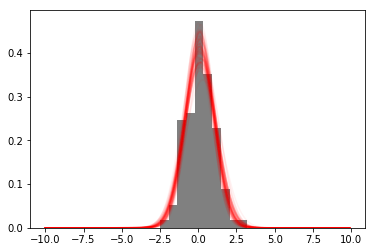

In [127]:
x = np.arange(-10, 10, 0.1)

THIN = 50

plt.hist(y, density=True, facecolor='gray')

for mu, sd in zip(trace['mu'][::THIN], trace['sd'][::THIN]):
    pdf = scipy.stats.norm.pdf(x, loc=mu, scale=sd)
    plt.plot(x, pdf, color='red', alpha=0.05)

In [132]:
with model:
    ppc = pm.sample_posterior_predictive(trace)








  0%|                                                                           | 0/1000 [00:00<?, ?it/s]

TypeError: 'numpy.ndarray' object is not callable